In [1]:
# Script to graph the number of NODES all algorithms for k=1000 (gradual retrieval and ranked enumeration)
## first scenario

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns

In [12]:
def load_hex_file(file_path):
    with open(file_path, 'r') as file:
        # Read lines, strip whitespace, and convert from hex to float
        return np.array([float.fromhex(line.strip()) for line in file])


In [13]:
alg_label = ["Original",
             "R. LOUDS Backtrack.", 
             "R. LOUDS Op. Order",
             "R. DFUDS Backtrack.", 
             "R. DFUDS Op. Order"]
        
queries_label = ["j3","j4","p2","p3","p4","s1","s2","s3","s4","t2","t3","t4","ti2","ti3","ti4","tr1","tr2"]

queries_title = ["J3","J4","P2","P3","P4","S1","S2","S3","S4","T2","T3","T4","Ti2","Ti3","Ti4","Tr1","Tr2"]

In [14]:
data = []
rows, cols = 17, 5 
row_template = [0] * cols
data = [row_template[:] for _ in range(rows)]

#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

for type_fun in [0]:#,1]:
    for k in [1000]: 
        for i,query in enumerate(queries_label): 
            file = f"{query}-f{type_fun}-k{k}-nodes.txt"
            file_original = f"{query}-k1000000-nodes.txt"
            
            original = load_hex_file(f'../../original/{file_original}')

            rankedLoudsBack = load_hex_file(f'../../ranked/louds/backtracking/{file}')
            rankedLoudsNon = load_hex_file(f'../../ranked/louds/optimalOrder/{file}')
            rankedDfudsBack = load_hex_file(f'../../ranked/dfuds/backtracking/{file}')
            rankedDfudsNon = load_hex_file(f'../../ranked/dfuds/optimalOrder/{file}')
            data[i] = [original, 
                       rankedLoudsBack, 
                       rankedLoudsNon, 
                       rankedDfudsBack, 
                       rankedDfudsNon]

In [15]:
# colors:
# https://matplotlib.org/stable/gallery/color/named_colors.html
#colors = ['hotpink','red','peru']#, 'lightsalmon', 'gold', 'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']
colors = ['red','dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']


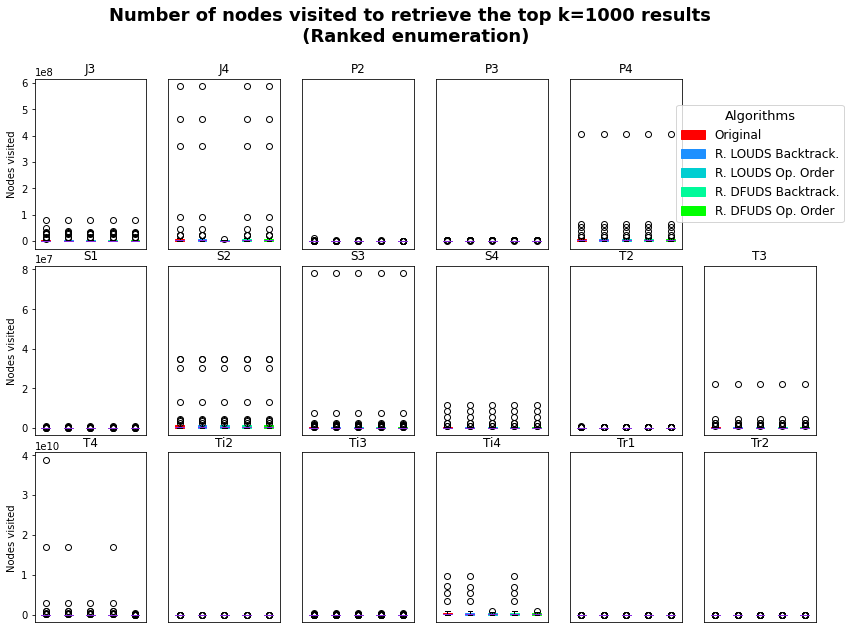

In [16]:
# GRAPH
# Crear la figura
fig = plt.figure(figsize=(14,10))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(3, 6, figure=fig, hspace=0.1, wspace=0.2)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1],sharey=j3)
p2 = fig.add_subplot(gs[0, 2],sharey=j3)
p3 = fig.add_subplot(gs[0, 3],sharey=j3)
p4 = fig.add_subplot(gs[0, 4], sharey=j3)
color_legend = fig.add_subplot(gs[0, 5]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[1, 0])
s2 = fig.add_subplot(gs[1, 1],sharey=s1)
s3 = fig.add_subplot(gs[1, 2],sharey=s1)
s4 = fig.add_subplot(gs[1, 3],sharey=s1)
t2 = fig.add_subplot(gs[1, 4],sharey=s1)
t3 = fig.add_subplot(gs[1, 5], sharey=s1)

t4 = fig.add_subplot(gs[2, 0])
ti2 = fig.add_subplot(gs[2, 1],sharey=t4)
ti3 = fig.add_subplot(gs[2, 2],sharey=t4)
ti4 = fig.add_subplot(gs[2, 3], sharey=t4)
tr1 = fig.add_subplot(gs[2, 4],sharey=t4)
tr2 = fig.add_subplot(gs[2, 5],sharey=t4)

j3.set_ylabel('Nodes visited')
s1.set_ylabel('Nodes visited')
t4.set_ylabel('Nodes visited')


# Plot as usual
for i, query in enumerate([j3, j4, p2, p3, p4, s1, s2, s3, s4, t2, t3, t4, ti2, ti3, ti4, tr1, tr2]):
    for j, alg in enumerate(alg_label):
        bp = query.boxplot(data[i][j], positions=[j], whis=1, widths=0.4, patch_artist=True, 
                           boxprops=dict(facecolor=colors[j], color=colors[j], label=alg_label[j]),
                           medianprops=dict(color='blueviolet'))
    #query.set_yscale('log')
    query.set_title(queries_title[i])
    query.axes.get_xaxis().set_visible(False)
    if query != j3 and query != s1 and query != t4:
        query.axes.get_yaxis().set_visible(False)
        
        
        
handles, labels = j3.get_legend_handles_labels()
color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=12,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=13  # Set font size for the title
)

    
fig.suptitle('Number of nodes visited to retrieve the top k=1000 results \n (Ranked enumeration)', fontsize=18, fontweight='bold')

    
plt.savefig('/Users/asugomez/Desktop/Magister/Tesis/tesisQdags/imagenes/ranked_fix_k-nodes.pdf')

plt.show()


In [17]:
## second scenario: only plot queries with results > 1000
alg_label = ["Original",
             "R. LOUDS Backtrack.", 
             "R. LOUDS Op. Order",
             "R. DFUDS Backtrack.", 
             "R. DFUDS Op. Order"]
queries_title_v1000 = ["J3","J4","P2","P3","P4","S3","T2","T3","T4","Ti2","Ti3"] #"S3","T3","Ti4 (log scale)"
queries_label_v1000=["j3","j4","p2","p3","p4","s3","t2","t3","t4","ti2","ti3"] # "s3", "t3","ti4"

In [18]:
data_v1000 = []
rows, cols = 12, 9
row_template = [0] * cols
data_v1000 = [row_template[:] for _ in range(rows)]

#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

for type_fun in [0]:#,1]:
    for k in [1000]: 
        for i,query in enumerate(queries_label_v1000): 
            file = f"{query}-f{type_fun}-k{k}-v1000-nodes.txt"
            file_original = f"{query}-k1000000-v1000-nodes.txt"
            # Load files and convert from hexadecimal
            original = load_hex_file(f'../../query1000results/original/{file_original}')
            rankedLoudsBack = load_hex_file(f'../../query1000results/ranked/louds/backtracking/{file}')
            rankedLoudsNon = load_hex_file(f'../../query1000results/ranked/louds/optimalOrder/{file}')
            rankedDfudsBack = load_hex_file(f'../../query1000results/ranked/dfuds/backtracking/{file}')
            rankedDfudsNon = load_hex_file(f'../../query1000results/ranked/dfuds/optimalOrder/{file}')

      
            data_v1000[i] = [original, 
                       rankedLoudsBack, 
                       rankedLoudsNon, 
                       rankedDfudsBack, 
                       rankedDfudsNon]
                

In [19]:
# colors:
# https://matplotlib.org/stable/gallery/color/named_colors.html
#colors = ['hotpink','red','peru']#, 'lightsalmon', 'gold', 'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']
colors = ['red','dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']


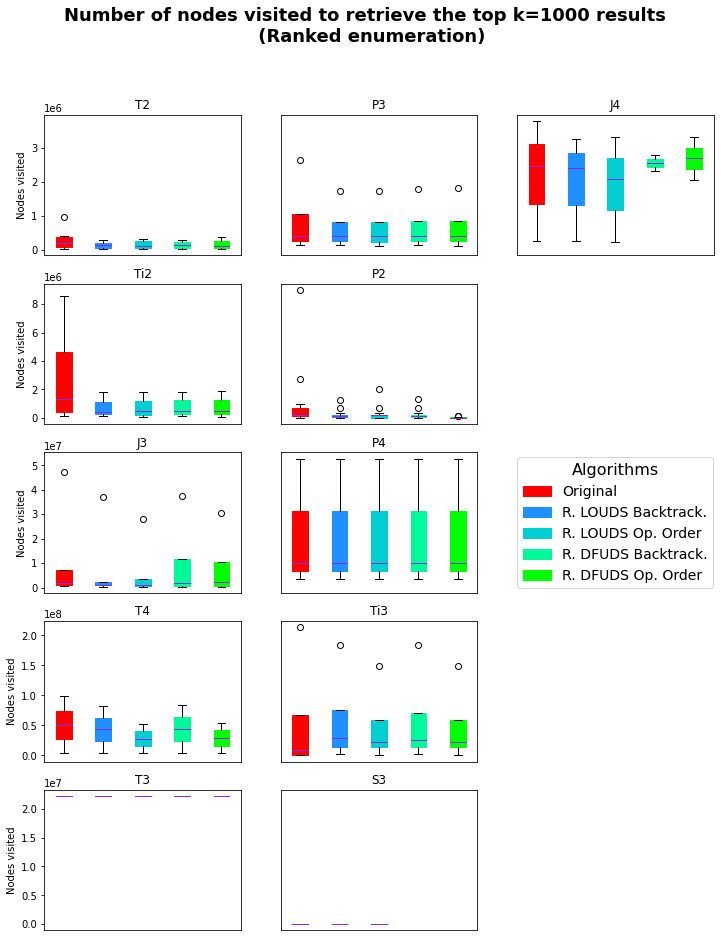

In [20]:
# Crear la figura
fig = plt.figure(figsize=(12,15))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(5,3, figure=fig, hspace=0.2, wspace=0.2)

# Añadir los subplots a la figura
t2 = fig.add_subplot(gs[0, 0])
p3 = fig.add_subplot(gs[0, 1],sharey=t2)
j4 = fig.add_subplot(gs[0, 2],sharey=t2)
ti2 = fig.add_subplot(gs[1, 0])
p2 = fig.add_subplot(gs[1,1],sharey=ti2)
# Use the space of [1,2], [2,2], and [3,2] for the legend
color_legend = fig.add_subplot(gs[1:4, 2])  # Span rows 1 to 3 in the third column
color_legend.axis('off')  # Hide the axes for the legend subplot

j3 = fig.add_subplot(gs[2, 0])
p4 = fig.add_subplot(gs[2, 1],sharey=j3)

t4 = fig.add_subplot(gs[3, 0])
ti3 = fig.add_subplot(gs[3, 1],sharey=t4)

t3 = fig.add_subplot(gs[4,0])
s3 = fig.add_subplot(gs[4, 1],sharey=t3)

t2.set_ylabel('Nodes visited')
ti2.set_ylabel('Nodes visited')
j3.set_ylabel('Nodes visited')
t3.set_ylabel('Nodes visited')
t4.set_ylabel('Nodes visited')


# Plot as usual
for i, query in enumerate([j3,j4,p2,p3,p4,s3,t2,t3,t4,ti2,ti3]):
    for j, alg in enumerate(alg_label):
        bp = query.boxplot(data_v1000[i][j], positions=[j], whis=1, widths=0.4, patch_artist=True, 
                           boxprops=dict(facecolor=colors[j], color=colors[j], label=alg_label[j]),
                           medianprops=dict(color='blueviolet'))
    #query.set_yscale('log')
    query.set_title(queries_title_v1000[i])
    query.axes.get_xaxis().set_visible(False)
    if query != t2 and query != ti2 and query != j3 and query != t3 and query != t4:
        query.axes.get_yaxis().set_visible(False)
        
        
        
handles, labels = j3.get_legend_handles_labels()
color_legend.legend(handles, labels, loc='center', fontsize='x-small')
    
color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=14,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=16  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
fig.suptitle('Number of nodes visited to retrieve the top k=1000 results \n (Ranked enumeration)', fontsize=18, fontweight='bold')

plt.savefig('/Users/asugomez/Desktop/Magister/Tesis/tesisQdags/imagenes/ranked_fix_k-v1000-nodes.pdf')

plt.show()